In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import sys
from sonia.sonia_leftpos_rightpos import SoniaLeftposRightpos
from sonia.evaluate_model import EvaluateModel
from sonia.sequence_generation import SequenceGeneration
from sonia.plotting import Plotter
get_ipython().magic(u'matplotlib inline')

2022-02-15 15:45:49.103795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:
2022-02-15 15:45:49.103830: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Sharing Plot

In [2]:
N = pd.read_csv('N_ancestors.txt', header=None, delimiter='\t')

In [3]:
f1 = pd.read_csv('ppost_cdr3aa_igg_coeff.txt', delimiter='\t')
f1 = f1.dropna(subset=['ppost'])
f1 = f1[f1.ppost > 1e-50]
aa_hist, bins_aa = np.histogram(-np.log(f1.ppost), bins=(1000), density=True)

Epost = bins_aa[:-1]
Ppost = aa_hist
expost = np.exp(Epost)
gpost = np.multiply(Ppost, expost)
delta = Epost[2]-Epost[1]

In [4]:
f=0.14
q=1
k=0
integrand1=0

for i in range(0,400):
    d=np.poly1d([0,1])
    for k in range(len(N)):
        a=b=0
        a = 1-np.exp(-np.exp(-Epost[i])*N[k]/(f*q))
        b = np.exp(-np.exp(-Epost[i])*N[k]/(f*q))
        c = np.poly1d([a,b])
        d=np.convolve(d,c)
    integrand1+=gpost[i]*f*q*delta*d

In [5]:
x = list(np.flip(integrand1))
y = np.zeros(32)
x=np.array(x[1:13])

In [6]:
M = np.concatenate((x,y), axis=None)
snumber =  np.array(range(1,45))

M_error = []
for element in M:
    M_error.append(np.sqrt(element))

In [4]:
fInput = 'counts_covid.txt'
fData = np.loadtxt(fInput,skiprows=0,usecols=0,dtype=str)
array = np.array(fData)
unique, index, inverse, counts_covid = np.unique(array, return_index = True, return_inverse = True, return_counts = True)

In [8]:
hist_covid,_ = np.histogram(counts_covid, bins = np.arange(counts_covid.min(), counts_covid.max()+2))

### Significance plot

In [9]:
fInput = 'total_covid_igg_cdr3aa_vj_shifted.txt'
df = pd.read_csv(fInput, delimiter='\t')
ppost = df['ppost']/2.9e-12

df2 = df.loc[df['p']<1e-4, ['ppost','pdata']]
ppost2 = ppost
pdata2 = df2['pdata']

In [11]:
fInput = '/home/ruiz/Sharing/SARS-CoV-2/All_datasets/x>1/Igg_pdata.txt'
df = pd.read_csv(fInput, delimiter='\t', header=None)
pdata = df[0]

In [12]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

In [13]:
x = np.log10(pdata)
y = np.log10(ppost)
x2 = np.log10(pdata2)
y2 = np.log10(ppost2)

### Model statistics

In [14]:
# COVID19 & Healthy models

In [15]:
# COVID-19 (all sequences)

qm_osb = SoniaLeftposRightpos(load_dir='Ppost_model_Osbourn',chain_type='humanIGH')
initial_osb=np.array([s[0][0] for s in qm_osb.features])
l_length_osb=len(np.arange(len(initial_osb))[initial_osb=='l'])
a_length_osb=len(np.arange(len(initial_osb))[initial_osb=='a'])
vj_length_osb=len(np.arange(len(initial_osb))[initial_osb=='v'])

vj_features_osb=np.array(qm_osb.features[-vj_length_osb:])
v_genes_osb=[]
j_genes_osb=[]
for feat in vj_features_osb:
    if not feat[1] in j_genes_osb: j_genes_osb.append(feat[1])
    if not feat[0] in v_genes_osb: v_genes_osb.append(feat[0])
vj_data_marginals_osb=np.array(qm_osb.data_marginals[-vj_length_osb:]).reshape(len(v_genes_osb),len(j_genes_osb))

qm_boy = SoniaLeftposRightpos(load_dir='Ppost_model_Boyd',chain_type='humanIGH')
initial_boy=np.array([s[0][0] for s in qm_boy.features])
l_length_boy=len(np.arange(len(initial_boy))[initial_boy=='l'])
a_length_boy=len(np.arange(len(initial_boy))[initial_boy=='a'])
vj_length_boy=len(np.arange(len(initial_boy))[initial_boy=='v'])

vj_features_boy=np.array(qm_boy.features[-vj_length_boy:])
v_genes_boy=[]
j_genes_boy=[]
for feat in vj_features_boy:
    if not feat[1] in j_genes_boy: j_genes_boy.append(feat[1])
    if not feat[0] in v_genes_boy: v_genes_boy.append(feat[0])
vj_data_marginals_boy=np.array(qm_boy.data_marginals[-vj_length_boy:]).reshape(len(v_genes_boy),len(j_genes_boy))

qm_mok = SoniaLeftposRightpos(load_dir='Ppost_model_Mok',chain_type='humanIGH')
initial_mok=np.array([s[0][0] for s in qm_mok.features])
l_length_mok=len(np.arange(len(initial_mok))[initial_mok=='l'])
a_length_mok=len(np.arange(len(initial_mok))[initial_mok=='a'])
vj_length_mok=len(np.arange(len(initial_mok))[initial_mok=='v'])

vj_features_mok=np.array(qm_mok.features[-vj_length_mok:])
v_genes_mok=[]
j_genes_mok=[]
for feat in vj_features_mok:
    if not feat[1] in j_genes_mok: j_genes_mok.append(feat[1])
    if not feat[0] in v_genes_mok: v_genes_mok.append(feat[0])
vj_data_marginals_mok=np.array(qm_mok.data_marginals[-vj_length_mok:]).reshape(len(v_genes_mok),len(j_genes_mok))

2021-12-13 15:49:23.452865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:
2021-12-13 15:49:23.452899: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-13 15:49:23.452926: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zuzia): /proc/driver/nvidia/version does not exist
2021-12-13 15:49:23.453178: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Healthy (all sequences)

qm_h1 = SoniaLeftposRightpos(load_dir='Ppost_model_healthy/sample1',chain_type='humanIGH')
initial_h1=np.array([s[0][0] for s in qm_h1.features])
l_length_h1=len(np.arange(len(initial_h1))[initial_h1=='l'])
a_length_h1=len(np.arange(len(initial_h1))[initial_h1=='a'])
vj_length_h1=len(np.arange(len(initial_h1))[initial_h1=='v'])

vj_features_h1=np.array(qm_h1.features[-vj_length_h1:])
v_genes_h1=[]
j_genes_h1=[]
for feat in vj_features_h1:
    if not feat[1] in j_genes_h1: j_genes_h1.append(feat[1])
    if not feat[0] in v_genes_h1: v_genes_h1.append(feat[0])
vj_data_marginals_h1=np.array(qm_h1.data_marginals[-vj_length_h1:]).reshape(len(v_genes_h1),len(j_genes_h1))

qm_h2 = SoniaLeftposRightpos(load_dir='Ppost_model_healthy/sample2',chain_type='humanIGH')
initial_h2=np.array([s[0][0] for s in qm_h2.features])
l_length_h2=len(np.arange(len(initial_h2))[initial_h2=='l'])
a_length_h2=len(np.arange(len(initial_h2))[initial_h2=='a'])
vj_length_h2=len(np.arange(len(initial_h2))[initial_h2=='v'])

vj_features_h2=np.array(qm_h2.features[-vj_length_h2:])
v_genes_h2=[]
j_genes_h2=[]
for feat in vj_features_h2:
    if not feat[1] in j_genes_h2: j_genes_h2.append(feat[1])
    if not feat[0] in v_genes_h2: v_genes_h2.append(feat[0])
vj_data_marginals_h2=np.array(qm_h2.data_marginals[-vj_length_h2:]).reshape(len(v_genes_h2),len(j_genes_h2))

qm_h3 = SoniaLeftposRightpos(load_dir='Ppost_model_healthy/sample3',chain_type='humanIGH')
initial_h3=np.array([s[0][0] for s in qm_h3.features])
l_length_h3=len(np.arange(len(initial_h3))[initial_h3=='l'])
a_length_h3=len(np.arange(len(initial_h3))[initial_h3=='a'])
vj_length_h3=len(np.arange(len(initial_h3))[initial_h3=='v'])

vj_features_h3=np.array(qm_h3.features[-vj_length_h3:])
v_genes_h3=[]
j_genes_h3=[]
for feat in vj_features_h3:
    if not feat[1] in j_genes_h3: j_genes_h3.append(feat[1])
    if not feat[0] in v_genes_h3: v_genes_h3.append(feat[0])
vj_data_marginals_h3=np.array(qm_h3.data_marginals[-vj_length_h3:]).reshape(len(v_genes_h3),len(j_genes_h3))

qm_h4 = SoniaLeftposRightpos(load_dir='Ppost_model_healthy/sample4',chain_type='humanIGH')
initial_h4=np.array([s[0][0] for s in qm_h4.features])
l_length_h4=len(np.arange(len(initial_h4))[initial_h4=='l'])
a_length_h4=len(np.arange(len(initial_h4))[initial_h4=='a'])
vj_length_h4=len(np.arange(len(initial_h4))[initial_h4=='v'])

vj_features_h4=np.array(qm_h4.features[-vj_length_h4:])
v_genes_h4=[]
j_genes_h4=[]
for feat in vj_features_h4:
    if not feat[1] in j_genes_h4: j_genes_h4.append(feat[1])
    if not feat[0] in v_genes_h4: v_genes_h4.append(feat[0])
vj_data_marginals_h4=np.array(qm_h4.data_marginals[-vj_length_h4:]).reshape(len(v_genes_h4),len(j_genes_h4))

qm_h = SoniaLeftposRightpos(load_dir='Ppost_model_healthy/sample5',chain_type='humanIGH')
initial_h=np.array([s[0][0] for s in qm_h.features])
l_length_h=len(np.arange(len(initial_h))[initial_h=='l'])
a_length_h=len(np.arange(len(initial_h))[initial_h=='a'])
vj_length_h=len(np.arange(len(initial_h))[initial_h=='v'])

vj_features_h=np.array(qm_h.features[-vj_length_h:])
v_genes_h=[]
j_genes_h=[]
for feat in vj_features_h:
    if not feat[1] in j_genes_h: j_genes_h.append(feat[1])
    if not feat[0] in v_genes_h: v_genes_h.append(feat[0])
vj_data_marginals_h=np.array(qm_h.data_marginals[-vj_length_h:]).reshape(len(v_genes_h),len(j_genes_h))

In [17]:
# COVID-19 Overshared

qm_s = SoniaLeftposRightpos(load_dir='Ppost_model_significant',chain_type='humanIGH')
initial_s=np.array([s[0][0] for s in qm_s.features])
l_length_s=len(np.arange(len(initial_s))[initial_s=='l'])
a_length_s=len(np.arange(len(initial_s))[initial_s=='a'])
vj_length_s=len(np.arange(len(initial_s))[initial_s=='v'])

vj_features_s=np.array(qm_s.features[-vj_length_s:])
v_genes_s=[]
j_genes_s=[]
for feat in vj_features_s:
    if not feat[1] in j_genes_s: j_genes_s.append(feat[1])
    if not feat[0] in v_genes_s: v_genes_s.append(feat[0])
vj_data_marginals_s=np.array(qm_s.data_marginals[-vj_length_s:]).reshape(len(v_genes_s),len(j_genes_s))

In [18]:
# Healthy Overshared

qm_h_s = SoniaLeftposRightpos(load_dir='Ppost_model_healthy/significant',chain_type='humanIGH')
initial_h_s=np.array([h[0][0] for h in qm_h_s.features])
l_length_h_s=len(np.arange(len(initial_h_s))[initial_h_s=='l'])
a_length_h_s=len(np.arange(len(initial_h_s))[initial_h_s=='a'])
vj_length_h_s=len(np.arange(len(initial_h_s))[initial_h_s=='v'])

vj_features_h_s=np.array(qm_h_s.features[-vj_length_h_s:])
v_genes_h_s=[]
j_genes_h_s=[]
for feat in vj_features_h_s:
    if not feat[1] in j_genes_h_s: j_genes_h_s.append(feat[1])
    if not feat[0] in v_genes_h_s: v_genes_h_s.append(feat[0])
vj_data_marginals_h_s=np.array(qm_h_s.data_marginals[-vj_length_h_s:]).reshape(len(v_genes_h_s),len(j_genes_h_s))

Cannot find gen_seqs.tsv  --  no generated seqs loaded.


In [19]:
v_genes_s = [x.replace('v', 'IGHV') for x in v_genes_s]
v_genes_h = [x.replace('v', 'IGHV') for x in v_genes_h]
v_genes_h1 = [x.replace('v', 'IGHV') for x in v_genes_h1]
v_genes_h2 = [x.replace('v', 'IGHV') for x in v_genes_h2]
v_genes_h3 = [x.replace('v', 'IGHV') for x in v_genes_h3]
v_genes_h4 = [x.replace('v', 'IGHV') for x in v_genes_h4]
v_genes_osb = [x.replace('v', 'IGHV') for x in v_genes_osb]
v_genes_boy = [x.replace('v', 'IGHV') for x in v_genes_boy]
v_genes_mok = [x.replace('v', 'IGHV') for x in v_genes_mok]
j_genes_h = [y.replace('j', 'IGHJ') for y in j_genes_h]
j_genes_s = [y.replace('j', 'IGHJ') for y in j_genes_s]
j_genes_h1 = [y.replace('j', 'IGHJ') for y in j_genes_h1]
j_genes_h2 = [y.replace('j', 'IGHJ') for y in j_genes_h2]
j_genes_h3 = [y.replace('j', 'IGHJ') for y in j_genes_h3]
j_genes_h4 = [y.replace('j', 'IGHJ') for y in j_genes_h4]
j_genes_osb = [y.replace('j', 'IGHJ') for y in j_genes_osb]
j_genes_boy = [y.replace('j', 'IGHJ') for y in j_genes_boy]
j_genes_mok = [y.replace('j', 'IGHJ') for y in j_genes_mok]

In [20]:
orderv_osb=np.argsort(vj_data_marginals_osb.mean(axis=1))[::-1]
orderv_boy=np.argsort(vj_data_marginals_boy.mean(axis=1))[::-1]
orderv_mok=np.argsort(vj_data_marginals_mok.mean(axis=1))[::-1]
orderv_h=np.argsort(vj_data_marginals_h.mean(axis=1))[::-1]
orderv_s=np.argsort(vj_data_marginals_s.mean(axis=1))[::-1]
orderv_h1=np.argsort(vj_data_marginals_h1.mean(axis=1))[::-1]
orderv_h2=np.argsort(vj_data_marginals_h2.mean(axis=1))[::-1]
orderv_h3=np.argsort(vj_data_marginals_h3.mean(axis=1))[::-1]
orderv_h4=np.argsort(vj_data_marginals_h4.mean(axis=1))[::-1]

df_PV_osb = pd.Series(dict(zip(np.array(v_genes_osb)[orderv_osb], vj_data_marginals_osb.sum(axis=1)[orderv_osb]))).to_frame("pV")
df_PV_boy = pd.Series(dict(zip(np.array(v_genes_boy)[orderv_boy], vj_data_marginals_boy.sum(axis=1)[orderv_boy]))).to_frame("pV")
df_PV_mok = pd.Series(dict(zip(np.array(v_genes_mok)[orderv_mok], vj_data_marginals_mok.sum(axis=1)[orderv_mok]))).to_frame("pV")
df_PV_s = pd.Series(dict(zip(np.array(v_genes_s)[orderv_s], vj_data_marginals_s.sum(axis=1)[orderv_s]))).to_frame("pV")
df_PV_h = pd.Series(dict(zip(np.array(v_genes_h)[orderv_h], vj_data_marginals_h.sum(axis=1)[orderv_h]))).to_frame("pV")
df_PV_h1 = pd.Series(dict(zip(np.array(v_genes_h1)[orderv_h1], vj_data_marginals_h1.sum(axis=1)[orderv_h1]))).to_frame("pV")
df_PV_h2 = pd.Series(dict(zip(np.array(v_genes_h2)[orderv_h2], vj_data_marginals_h2.sum(axis=1)[orderv_h2]))).to_frame("pV")
df_PV_h3 = pd.Series(dict(zip(np.array(v_genes_h3)[orderv_h3], vj_data_marginals_h3.sum(axis=1)[orderv_h3]))).to_frame("pV")
df_PV_h4 = pd.Series(dict(zip(np.array(v_genes_h4)[orderv_h4], vj_data_marginals_h4.sum(axis=1)[orderv_h4]))).to_frame("pV")


In [21]:
listOfStrings1 = ['Covid-19' for i in range(75)]
listOfStrings2 = ['Healthy' for i in range(75)]
listOfStrings3 = ['Covid-19 Significant' for i in range(75)]


df_PV_osb['diagnosis'] = listOfStrings1
df_PV_boy['diagnosis'] = listOfStrings1
df_PV_mok['diagnosis'] = listOfStrings1
df_PV_s['diagnosis'] = listOfStrings3
df_PV_h['diagnosis'] = listOfStrings2
df_PV_h1['diagnosis'] = listOfStrings2
df_PV_h2['diagnosis'] = listOfStrings2
df_PV_h3['diagnosis'] = listOfStrings2
df_PV_h4['diagnosis'] = listOfStrings2


df_PV_f1 = df_PV_h.append(df_PV_h1)
df_PV_f2 = df_PV_f1.append(df_PV_h2)
df_PV_f3 = df_PV_f2.append(df_PV_h3)
df_PV_f4 = df_PV_f3.append(df_PV_h4)
df_PV_f5 = df_PV_f4.append(df_PV_osb)
df_PV_f6 = df_PV_f5.append(df_PV_boy)
df_PV_f7 = df_PV_f6.append(df_PV_mok)
df_PV_f = df_PV_f7.append(df_PV_s)

df_PV_f.loc[df_PV_f['pV']>0.01,:].pV

IGHV3-23      0.110797
IGHV4-59      0.066330
IGHV4-34      0.060589
IGHV3-30      0.057674
IGHV1-2       0.054135
                ...   
IGHV6-1       0.025490
IGHV3-74      0.021194
IGHV4-30-4    0.019189
IGHV5-51      0.011886
IGHV3-11      0.010311
Name: pV, Length: 238, dtype: float64

In [22]:
orderj_osb=np.argsort(vj_data_marginals_osb.mean(axis=0))[::-1]
orderj_boy=np.argsort(vj_data_marginals_boy.mean(axis=0))[::-1]
orderj_mok=np.argsort(vj_data_marginals_mok.mean(axis=0))[::-1]
orderj_s=np.argsort(vj_data_marginals_s.mean(axis=0))[::-1]
orderj_h=np.argsort(vj_data_marginals_h.mean(axis=0))[::-1]
orderj_h1=np.argsort(vj_data_marginals_h1.mean(axis=0))[::-1]
orderj_h2=np.argsort(vj_data_marginals_h2.mean(axis=0))[::-1]
orderj_h3=np.argsort(vj_data_marginals_h3.mean(axis=0))[::-1]
orderj_h4=np.argsort(vj_data_marginals_h4.mean(axis=0))[::-1]


df_PJ_osb = pd.Series(dict(zip(np.array(j_genes_osb)[orderj_osb], vj_data_marginals_osb.sum(axis=0)[orderj_osb]))).to_frame("pJ")
df_PJ_boy = pd.Series(dict(zip(np.array(j_genes_boy)[orderj_boy], vj_data_marginals_boy.sum(axis=0)[orderj_boy]))).to_frame("pJ")
df_PJ_mok = pd.Series(dict(zip(np.array(j_genes_mok)[orderj_mok], vj_data_marginals_mok.sum(axis=0)[orderj_mok]))).to_frame("pJ")
df_PJ_s = pd.Series(dict(zip(np.array(j_genes_s)[orderj_s], vj_data_marginals_s.sum(axis=0)[orderj_s]))).to_frame("pJ")
df_PJ_h = pd.Series(dict(zip(np.array(j_genes_h)[orderj_h], vj_data_marginals_h.sum(axis=0)[orderj_h]))).to_frame("pJ")
df_PJ_h1 = pd.Series(dict(zip(np.array(j_genes_h1)[orderj_h1], vj_data_marginals_h1.sum(axis=0)[orderj_h1]))).to_frame("pJ")
df_PJ_h2 = pd.Series(dict(zip(np.array(j_genes_h2)[orderj_h2], vj_data_marginals_h2.sum(axis=0)[orderj_h2]))).to_frame("pJ")
df_PJ_h3 = pd.Series(dict(zip(np.array(j_genes_h3)[orderj_h3], vj_data_marginals_h3.sum(axis=0)[orderj_h3]))).to_frame("pJ")
df_PJ_h4 = pd.Series(dict(zip(np.array(j_genes_h4)[orderj_h4], vj_data_marginals_h4.sum(axis=0)[orderj_h4]))).to_frame("pJ")
#df_PJ_h_s = pd.Series(dict(zip(np.array(j_genes_h_s)[orderj_h_s], vj_data_marginals_h_s.sum(axis=0)[orderj_h_s]))).to_frame("pJ")

In [23]:
listOfStrings4 = ['Covid-19 Significant' for i in range(6)]
listOfStrings5 = ['Covid-19' for i in range(6)]
listOfStrings6 = ['Healthy' for i in range(6)]

df_PJ_osb['diagnosis'] = listOfStrings5
df_PJ_boy['diagnosis'] = listOfStrings5
df_PJ_mok['diagnosis'] = listOfStrings5
df_PJ_s['diagnosis'] = listOfStrings4
df_PJ_h['diagnosis'] = listOfStrings6
df_PJ_h1['diagnosis'] = listOfStrings6
df_PJ_h2['diagnosis'] = listOfStrings6
df_PJ_h3['diagnosis'] = listOfStrings6
df_PJ_h4['diagnosis'] = listOfStrings6

df_PJ_f1 = df_PJ_h.append(df_PJ_h1)
df_PJ_f2 = df_PJ_f1.append(df_PJ_h2)
df_PJ_f3 = df_PJ_f2.append(df_PJ_h3)
df_PJ_f4 = df_PJ_f3.append(df_PJ_h4)
df_PJ_f5 = df_PJ_f4.append(df_PJ_boy)
df_PJ_f6 = df_PJ_f5.append(df_PJ_osb)
df_PJ_f7 = df_PJ_f6.append(df_PJ_mok)
#df_PJ_f8 = df_PJ_f7.append(df_PJ_h_s)
df_PJ_f = df_PJ_f7.append(df_PJ_s)

In [24]:
# CDR3 Length

In [24]:
data_c = np.array([qm_osb.data_marginals[:l_length_osb],qm_boy.data_marginals[:l_length_boy],qm_mok.data_marginals[:l_length_mok]])
mean_data_c = np.mean(data_c, axis=0)
std_data_c = np.std(data_c, axis=0)

data_h = np.array([qm_h.data_marginals[:l_length_h],qm_h1.data_marginals[:l_length_h1],qm_h2.data_marginals[:l_length_h2],qm_h3.data_marginals[:l_length_h3],qm_h4.data_marginals[:l_length_h4]])
mean_data_h = np.mean(data_h, axis=0)
std_data_h = np.std(data_h, axis=0)

data_s = np.array(qm_s.data_marginals[:l_length_s])

data_h_s = np.array(qm_h_s.data_marginals[:l_length_h_s])

### q fitting in severity groups

In [25]:
q_mild = [1.2e-5]
q_moderate =[ 6.321e-06, 9.936000000000001e-06, 2.2085999999999998e-05, 2.0406e-05, 1.5361e-05, 1.6051e-05, 2.8936e-05, 8.016e-06, 5.3606e-05,4.4326e-05,1.0071e-05]
q_severe = [2.6096e-05,7.236e-06,7.401e-06,5.791e-06,4.246e-06,7.036e-06,4.980999999999999e-06]

In [26]:
severity = []
severity.append('Mild')

for i in range(len(q_moderate)):
    severity.append('Moderate')
    
for i in range(len(q_severe)):
    severity.append('Severe')

In [27]:
q_total = q_mild+q_moderate+q_severe

In [63]:
x_dist = [0, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.15, 1.25,1.35, 1.05, 1.15,1.8,1.9,2.1,2,2.1,2.2,2.3]

In [64]:
df_q = pd.DataFrame(list(zip(q_total, severity, x_dist)),columns =['q_value', 'severity','x_dist'])

In [30]:
labels = ['Mild','Moderate', 'Severe']
x_pos = np.arange(len(labels))

### Plots

In [37]:
import matplotlib.pyplot as plt
font={'size': 10, 'weight': 'normal', 'family': 'DejaVu Sans'}
plt.rc('text', usetex=True)
plt.rc('font', **font)

/home/ruiz/miniconda3/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/ruiz/miniconda3/lib/python3.7/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


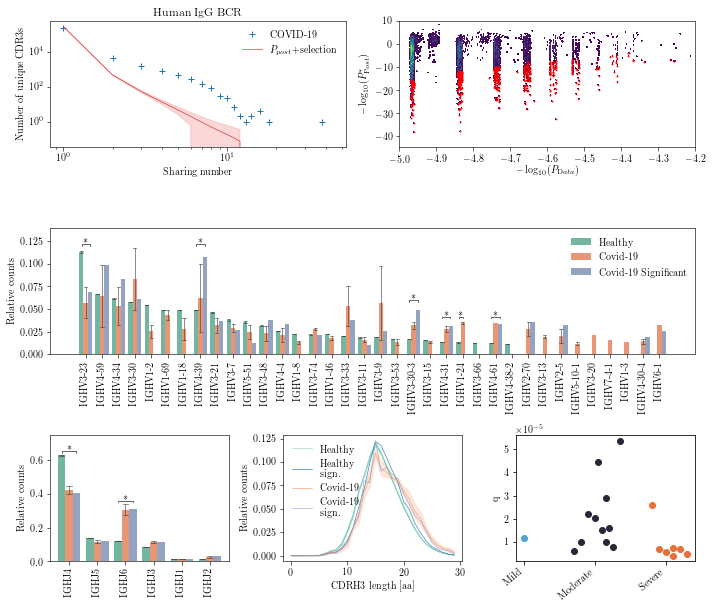

In [67]:
fig =  plt.figure(figsize=(10,8.57))
plt.rc('text', usetex=True)

# Plot 1

kwargs = {'xscale':'log', 'yscale':'log', 'xlabel':'Sharing number', 'ylabel':'Number of unique CDR3s', 'title':'Human IgG BCR'}

ax1 = plt.subplot(3,6,(1,3), **kwargs)
ax1.plot(np.arange(counts_covid.min(), counts_covid.max()+1), hist_covid, '+',color=sns.color_palette("Paired")[1], markersize=6, mew=1, label='COVID-19')

ax1.plot(snumber, M, color=sns.color_palette("Paired")[5],linewidth=.6, label='$P_{\mathrm post}$+selection')
ax1.fill_between(snumber,M-M_error,M+M_error,alpha=0.3,color='lightcoral')

ax1.legend(frameon=False)

# The spines
plt.setp(ax1.spines.values(), linewidth=.6)

# The ticks
ax1.xaxis.set_tick_params(width=.6)
ax1.yaxis.set_tick_params(width=.6)

# Plot 2

kwargs = {'xlabel':'$-\log_{10}(P_{\mathrm Data})$', 'ylabel':'$-\log_{10}(P^{*}_{\mathrm Post})$'}

xs = np.arange(6,2)
ax2 = plt.subplot(3,6,(4,6), projection='scatter_density', **kwargs)
density = ax2.scatter_density(x, y, cmap=white_viridis)
#density = ax2.scatter(x, y, color='blue',s=3)
scatter = ax2.scatter(x2,y2, color='red',s=0.7)
#plt.plot(xs,xs, ls = '--', lw=0.8, color='black')
ax2.set_ylim(-45,10)
ax2.set_xlim(-5,-4.2)

plt.setp(ax2.spines.values(), linewidth=.6)

ax2.xaxis.set_tick_params(width=.6)
ax2.yaxis.set_tick_params(width=.6)


# Plot 3

ax3 = plt.subplot(3,6,(7,12))

df_sel_V = df_PV_f.loc[df_PV_f['pV']>0.01,:]
g = sns.barplot(x=df_sel_V.index, y=df_sel_V.pV, hue=df_sel_V.diagnosis, palette='Set2', ax=ax3,
            errwidth=0.6,ci = "sd", capsize = 0.2)

# statistical annotation
x9, x10 = 22.75,23
x11, x12 = -0.25,0.25
y7,h,col = 0.04, 0.0015, 'k'
#y8 = df_PV_f['pV'].max()
y8 = 0.12
x13, x14 = 19.75, 20.25
y9 = 0.058
x15,x16 = 24.75,25.25
x17,x18 = 6.75,7.25
y10 = y8
x19,x20 = 21.75, 22.25

plt.plot([x9, x9, x10, x10], [y7, y7+h, y7+h, y7], lw=.6, c=col)
plt.text((x9+x10)*.5, y7+h, '*', ha='center', va='bottom', color=col)
plt.plot([x11, x11, x12, x12], [y8, y8+h, y8+h, y8], lw=.6, c=col)
plt.text((x11+x12)*.5, y8+h, '*', ha='center', va='bottom', color=col)
plt.plot([x13, x13, x14, x14], [y9, y9+h, y9+h, y9], lw=.6, c=col)
plt.text((x13+x14)*.5, y9+h, '*', ha='center', va='bottom', color=col)
plt.plot([x15, x15, x16, x16], [y7, y7+h, y7+h, y7], lw=.6, c=col)
plt.text((x15+x16)*.5, y7+h, '*', ha='center', va='bottom', color=col)
plt.plot([x17, x17, x18, x18], [y10, y10+h, y10+h, y10], lw=.6, c=col)
plt.text((x17+x18)*.5, y10+h, '*', ha='center', va='bottom', color=col)
plt.plot([x19, x19, x20, x20], [y7, y7+h, y7+h, y7], lw=.6, c=col)
plt.text((x19+x20)*.5, y7+h, '*', ha='center', va='bottom', color=col)

plt.xticks(rotation='vertical')
ax3.set_ylabel('Relative counts')
ax3.set_ylim(0,0.14)
ax3.legend(loc='upper right', title=None,frameon=False)

plt.setp(ax3.spines.values(), linewidth=.6)

ax3.xaxis.set_tick_params(width=.6)
ax3.yaxis.set_tick_params(width=.6)

# Plot 4

ax4 = plt.subplot(3,6,(13,14))

df_sel_J = df_PJ_f.loc[df_PJ_f['pJ']>0.01,:]
g = sns.barplot(x=df_sel_J.index, y=df_sel_J.pJ, hue=df_sel_J.diagnosis, palette='Set2', ax=ax4,
            errwidth=0.6,ci = "sd", capsize = 0.2)

# statistical annotation
x5, x6 = -0.25,0.25
x7, x8 = 1.75,2.25
y5,h,col = df_PJ_f['pJ'].max() + 0.015, 0.01, 'k'
y6 = 0.35

plt.plot([x5, x5, x6, x6], [y5, y5+h, y5+h, y5], lw=.6, c=col)
plt.text((x5+x6)*.5, y5+h, '*', ha='center', va='bottom', color=col)
plt.plot([x7, x7, x8, x8], [y6, y6+h, y6+h, y6], lw=.6, c=col)
plt.text((x7+x8)*.5, y6+h, '*', ha='center', va='bottom', color=col)

ax4.set_ylabel('Relative counts')
plt.xticks(rotation='vertical')
g.legend_.remove()
ax4.set_ylim(0,0.75)
#ax4.legend(frameon=False)

plt.setp(ax4.spines.values(), linewidth=.6)

ax4.xaxis.set_tick_params(width=.6)
ax4.yaxis.set_tick_params(width=.6)

# Plot 5

ax5 = plt.subplot(3,6,(15,16))
#ax5.bar(np.arange(l_length_h),qm_h.data_marginals[:l_length_h],label='Healthy',color = sns.color_palette("Set2")[1], edgecolor = 'black', width=1, alpha=0.8)
ax5.plot(np.arange(l_length_h),mean_data_h,color = sns.color_palette("Set2")[0],linewidth=.6, label='Healthy',alpha=0.7)
ax5.fill_between(np.arange(l_length_h),mean_data_h-2*std_data_h, mean_data_h+2*std_data_h,color = sns.color_palette("Set2")[0],alpha=0.5)
ax5.plot(np.arange(l_length_h_s),data_h_s,color = sns.color_palette("tab10")[0],linewidth=.6, label='Healthy \n sign.',alpha=1)
ax5.plot(np.arange(l_length_mok),mean_data_c,color = sns.color_palette("Set2")[1],linewidth=.6, label='Covid-19',alpha=0.9)
ax5.fill_between(np.arange(l_length_mok),mean_data_c-std_data_c, mean_data_c+std_data_c,color = sns.color_palette("Set2")[1],alpha=0.2)
ax5.plot(np.arange(l_length_s),data_s,color = sns.color_palette("Set2")[2],linewidth=.6, label='Covid-19 \n sign.',alpha=0.9)

ax5.legend(frameon=False, loc='upper left')
ax5.set_xlabel('CDRH3 length [aa]')
ax5.set_ylabel('Relative counts')

plt.setp(ax5.spines.values(), linewidth=.6)

ax5.xaxis.set_tick_params(width=.6)
ax5.yaxis.set_tick_params(width=.6)

# Plot 6

ax6 = plt.subplot(3,6,(17,18))

ax6.scatter(x=df_q['x_dist'][0], y=df_q["q_value"][0],color = sns.color_palette("icefire")[0])
ax6.scatter(x=df_q['x_dist'][1:12], y=df_q["q_value"][1:12],color = sns.color_palette("icefire")[2])
ax6.scatter(x=df_q['x_dist'][12:], y=df_q["q_value"][12:],color = sns.color_palette("icefire")[5])

ax6.set_xticks(x_pos)
ax6.set_xticklabels(labels)
ax6.set_ylabel('q')

#ax5.set(ylim=(0.42, 0.605))
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

fig.savefig('/home/ruiz/Figure3.pdf',bbox_inches='tight')

plt.show()